In [115]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


Text(0,0.5,'Accuracy')

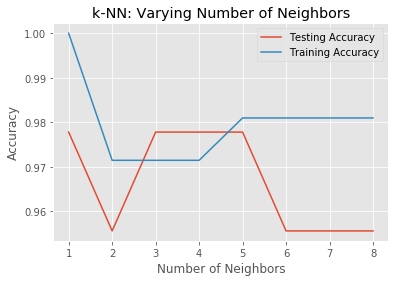

In [27]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=21, stratify=y)

k_n_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(k_n_neighbors))
test_accuracy = np.empty(len(k_n_neighbors))

for i, k in enumerate(k_n_neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(k_n_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_n_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
#plt.show()

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [7]:
X = cancer['data']

In [8]:
y = cancer['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)

In [12]:
knn = KNeighborsClassifier(n_neighbors=8)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [14]:
y_pred = knn.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred))

[[ 77   3]
 [  4 144]]


In [18]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96        80
          1       0.98      0.97      0.98       148

avg / total       0.97      0.97      0.97       228



Logistic Regression

In [62]:
cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
logreg = LogisticRegression()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)

In [43]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_pred = logreg.predict(X_test)

In [45]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [46]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

Text(0.5,1,'Logistic Regression ROC curve')

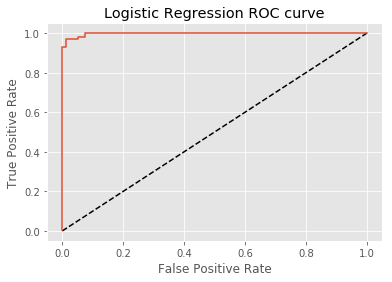

In [47]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')


In [48]:
#area under the curve (AUC) as a metric

In [50]:
roc_auc_score(y_test, y_pred_prob)

0.9976351351351351

In [52]:
#auc using cross-validation

In [53]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

In [54]:
print(cv_scores)

[0.99450904 0.99192506 0.99731724 0.98256204 0.99664655]


Grid Search with Cross Validation

In [56]:
param_grid ={'n_neighbors': np.arange(1,50)}

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [59]:
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
knn_cv.best_params_

{'n_neighbors': 12}

In [61]:
knn_cv.best_score_

0.9332161687170475

Hold-out set reasoning

In [64]:
c_space = np.logspace(-5, 8, 15)
param_grid ={'C': c_space,
            'penalty': ['l1', 'l2']}

In [65]:
logreg = LogisticRegression()

In [67]:
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

In [69]:
logreg_cv = logreg_cv.fit(X_train, y_train)

In [71]:
logreg_cv

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 100000000.0, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9560117302052786


PreProcessing

In [74]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [75]:
logreg = LogisticRegression()

In [81]:
steps = [('imputation', imp), ('logistic_regression', logreg)]

In [82]:
pipeline = Pipeline(steps)

In [83]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('logistic_regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [84]:
pipeline.score(X_test, y_test)

0.9649122807017544

In [88]:
wine = load_wine()

In [93]:
wine

{'DESCR': 'Wine Data Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- 1) Alcohol\n \t\t- 2) Malic acid\n \t\t- 3) Ash\n\t\t- 4) Alcalinity of ash  \n \t\t- 5) Magnesium\n\t\t- 6) Total phenols\n \t\t- 7) Flavanoids\n \t\t- 8) Nonflavanoid phenols\n \t\t- 9) Proanthocyanins\n\t\t- 10)Color intensity\n \t\t- 11)Hue\n \t\t- 12)OD280/OD315 of diluted wines\n \t\t- 13)Proline\n        \t- class:\n                - class_0\n                - class_1\n                - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80   

In [90]:
df_wine = pd.DataFrame(wine['data'], columns=wine['feature_names'])

In [92]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [99]:
X_wine = wine['data']
y_wine = wine['target']

In [100]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [98]:
#want features to be on a similar scale. Use normilaization.

In [101]:
X_wine_scaled = scale(X_wine)

In [102]:
np.mean(X_wine), np.std(X_wine)

(69.13366292091617, 215.74620420485243)

In [103]:
np.mean(X_wine_scaled), np.std(X_wine_scaled)

(4.66735072755122e-16, 1.0)

In [109]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

In [110]:
pipeline = Pipeline(steps)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=.2,random_state=21)

In [112]:
knn_scaled = pipeline.fit(X_train, y_train)

In [113]:
y_pred = pipeline.predict(X_test)

In [116]:
accuracy_score(y_test, y_pred)

0.9722222222222222

In [117]:
knn_unscaled = KNeighborsClassifier()

In [118]:
knn_unscaled.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [120]:
knn_unscaled.score(X_test, y_test)

0.6666666666666666

In [ ]:
accuracy_score()